In [1]:
# FaceBook Visualizations
import pandas as pd
# %%
# Imports
import pandas as pd
from datetime import datetime
import re
import matplotlib.pyplot as plt
from textblob import TextBlob
import spacy
from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import seaborn as sns
from multiprocessing import freeze_support

### Facebook Group Analysis

In [2]:
df_g = pd.read_csv('/Users/samharris/Desktop/Personal_Workspace/DSSD/Facebook_analysis/UPDATED_apify_group_scrape.csv')

In [3]:
df_g

,Poster,Comments,Reactions,time,Reposts,Content,topComments_0_comments,topComments_0_time,topComments_0_reactions,topComments_0_poster,topComments_0_content,topComments_1_comments,topComments_1_time,topComments_1_reactions,topComments_1_poster,topComments_1_content
0,Michelle Scott,7,94,2023-08-15T00:55:37.000Z,0,Daniel Scott and I made it out and are safe.,NaN,2023-08-15T00:58:13.000Z,0.0,Myrna Lynette,Woohoo❤️,NaN,2023-08-15T01:09:10.000Z,0.0,Barb Hunt-Atwell,🥰💞
1,Paulette Planidin West,11,68,2023-08-14T08:24:57.000Z,0,"Brian, Teagan & I (oh and Snoopy) are safe in ...",NaN,2023-08-14T09:28:55.000Z,1.0,Tracy Therrien,Good to hear. ❤️,1.0,2023-09-07T20:38:09.000Z,0.0,Vita Morin,Are you here in Peace River Paulette?
2,Trinity Bourque,11,2,2023-09-06T19:35:49.000Z,0,does anyone kno where Timmy Nadaray may be sta...,NaN,2023-09-06T19:57:54.000Z,3.0,Arliss Arbeau,Timmy is in Grande Prairie. I'm not sure whic...,3.0,2023-09-06T21:00:19.000Z,3.0,Jeannie Shae,He is here in Grand Prairie and staying at the...
3,Elizabeth Kikoak,9,11,2023-08-14T13:21:37.000Z,0,Anyone know if Lee John Kikoak got on a flight?,NaN,2023-08-14T13:36:37.000Z,0.0,Elizabeth Kikoak,#iso,1.0,2023-08-15T16:46:53.000Z,1.0,June Summer Kikoak,"Was too stubborn to leave, talked to him yeste..."
4,Brenda Breton,8,14,2023-08-27T06:26:32.000Z,0,I am safe and comfy Shaw’s Point Resort. Beau...,2.0,2023-08-27T23:31:48.000Z,1.0,Tyler Paton,Sounds expensive.,1.0,2023-09-05T16:04:48.000Z,0.0,Margaret Shott,Are you fishing 🎣
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,Kathy Lepine,2,4,2023-08-17T14:12:42.000Z,0,The new evacuation Center to register is Leduc...,NaN,2023-08-17T14:22:07.000Z,0.0,Tina O'Toole-Noel,"Also, Yellowknife residents are to go to",NaN,2023-08-17T14:48:55.000Z,0.0,Scott Clouthier,Leduc is only for South Slave evacuees
401,Lizzie Cardinal,0,4,2023-08-17T05:41:27.000Z,0,This is in Paddle Prairie Métis Settlement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,Sadetło Scott,1,0,2023-08-17T05:18:04.000Z,0,Note: Valleyview centre has changed - see new ...,NaN,2023-08-17T14:41:12.000Z,1.0,Scott Clouthier,Note: Valleyview centre has changed,NaN,NaN,NaN,NaN,NaN
403,Ginger Milne,4,15,2023-08-17T05:28:03.000Z,0,I wanted to put this out there while I have wi...,NaN,2023-08-17T08:08:51.000Z,0.0,Twyla Adele,"Stay safe, 🙏❤️",NaN,2023-08-17T14:40:20.000Z,0.0,Judy Zhou,Stay safe!


In [4]:
# Normalize the text: lowercase, remove punctuation and numbers, strip leading/trailing spaces
df_g['text_normalized'] = df_g['Content'].str.lower()
df_g['text_normalized'] = df_g['text_normalized'].apply(
    lambda x: re.sub(r'[\d.,!?"\':;]', '', x))
df_g['text_normalized'] = df_g['text_normalized'].str.strip()

In [5]:
df_g['text_normalized'].head()

0          daniel scott and i made it out and are safe
1    brian teagan & i (oh and snoopy) are safe in g...
2    does anyone kno where timmy nadaray may be sta...
3       anyone know if lee john kikoak got on a flight
4    i am safe and comfy shaw’s point resort  beaut...
Name: text_normalized, dtype: object

In [6]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity


# Apply the function to your dataframe
df_g['sentiment'] = df_g['text_normalized'].apply(
    get_sentiment)

In [7]:
df_g.tail(20)

,Poster,Comments,Reactions,time,Reposts,Content,topComments_0_comments,topComments_0_time,topComments_0_reactions,topComments_0_poster,topComments_0_content,topComments_1_comments,topComments_1_time,topComments_1_reactions,topComments_1_poster,topComments_1_content,text_normalized,sentiment
385,Jaylenn Tourangeau,0,4,2023-08-17T16:24:48.000Z,0,For all evacuees in GP ONLY I have been in con...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,for all evacuees in gp only i have been in con...,0.280000
386,Pamela Horesay,0,3,2023-08-17T16:24:27.000Z,0,"This is in Fort Simpson at the Northern Store,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,this is in fort simpson at the northern store ...,0.500000
387,Dixie Penner,3,63,2023-08-14T10:45:22.000Z,0,Dixie and Larry Penner safe in High Level.,NaN,2023-08-15T01:14:57.000Z,0.0,Leah M McNally,So good to hear!,NaN,2023-08-16T04:37:59.000Z,0.0,Gordon Seymour,Glad you guys are safe!,dixie and larry penner safe in high level,0.330000
388,Annie Goose,0,3,2023-08-17T16:22:09.000Z,0,My daughter Andrea Goose is safe she is waitin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,my daughter andrea goose is safe she is waitin...,0.500000
389,Jenn Chapados,0,1,2023-08-17T16:19:42.000Z,0,"Anyone in need of a place to stay, with a camp...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anyone in need of a place to stay with a campe...,0.000000
390,Jaylenn Tourangeau,8,0,2023-08-17T03:29:23.000Z,0,I am trying to get in touch with Christine Fab...,1.0,2023-08-17T03:59:44.000Z,0.0,Elizabeth Ann McKay,"I will let Christine know Irene, Kim & her kid...",NaN,NaN,NaN,NaN,NaN,i am trying to get in touch with christine fab...,0.000000
391,Jennifer Foster,0,4,2023-08-17T15:35:48.000Z,0,**UPDATE-travel arranged for lucky💕,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,**update-travel arranged for lucky💕,0.000000
392,Jane Ostler Groenewegen,18,257,2023-08-16T12:35:37.000Z,0,This is Jane Ostler Groenewegen\nI am in High ...,NaN,2023-08-16T14:21:49.000Z,9.0,Jane Balsillie,Yes 👍🏻 Jane G. Thanks for all your generosity ...,NaN,NaN,NaN,NaN,NaN,this is jane ostler groenewegen\ni am in high ...,0.214821
393,Bitsie JM,4,1,2023-08-17T15:32:44.000Z,0,I thought I would post this website: https://w...,NaN,2023-08-17T15:33:13.000Z,0.0,Bitsie JM,NaN,NaN,2023-08-17T15:33:23.000Z,0.0,Bitsie JM,NaN,i thought i would post this website https//www...,-0.233333
394,Carla McNeill,1,5,2023-08-17T15:31:07.000Z,0,There are rv sites in la Crete and possible fo...,NaN,2023-08-17T15:33:03.000Z,1.0,Kristen St. Arnault,NaN,NaN,NaN,NaN,NaN,NaN,there are rv sites in la crete and possible fo...,0.000000


In [8]:
df_g['time'] = pd.to_datetime(df_g['time'])

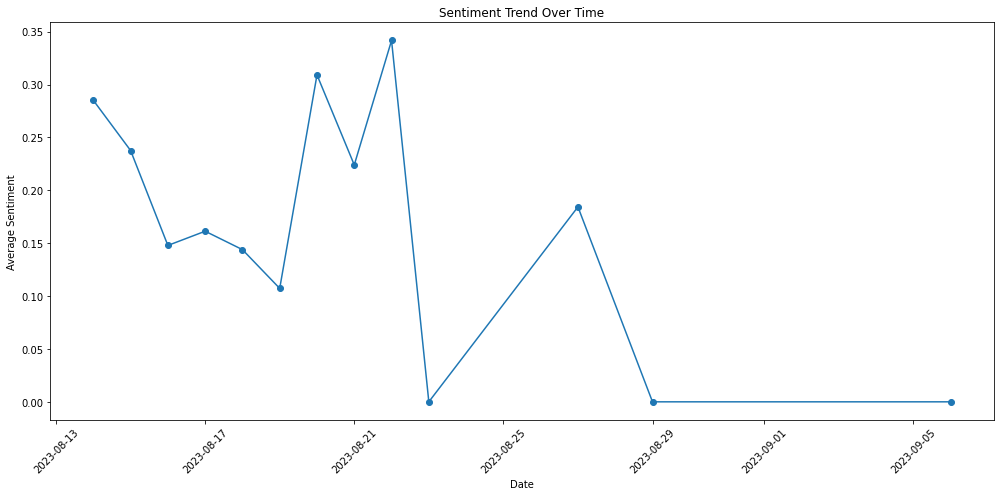

In [9]:
sentiment_time_series = df_g.groupby(df_g['time'].dt.date)[
    'sentiment'].mean().reset_index()

# Plotting the sentiment trend over time
plt.figure(figsize=(14, 7))
plt.plot(sentiment_time_series['time'].values,
         sentiment_time_series['sentiment'].values, marker='o')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of xlabel
plt.show()

In [10]:
sentiment_time_series

,time,sentiment
0,2023-08-14,0.285109
1,2023-08-15,0.237610
2,2023-08-16,0.147862
3,2023-08-17,0.161307
4,2023-08-18,0.143911
5,2023-08-19,0.107259
6,2023-08-20,0.309091
7,2023-08-21,0.224000
8,2023-08-22,0.341667
9,2023-08-23,0.000000


In [11]:
# Function to categorize sentiment scores
def categorize_sentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# Apply the function to create a new column with sentiment categories
df_g['Sentiment_Category'] = df_g['sentiment'].apply(categorize_sentiment)

# Group by sentiment category and count occurrences
grouped_data = df_g.groupby('Sentiment_Category').size()

# Print the result
print(grouped_data)

Sentiment_Category
Negative     38
Neutral     139
Positive    228
dtype: int64


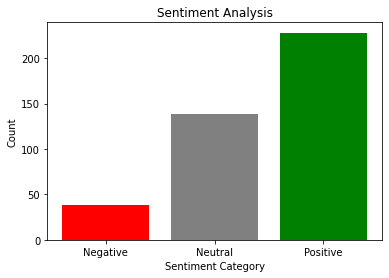

In [12]:
# Plotting the bar chart
plt.bar(grouped_data.index, grouped_data.values, color=['red', 'grey', 'green'])
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Sentiment Analysis')
plt.show()

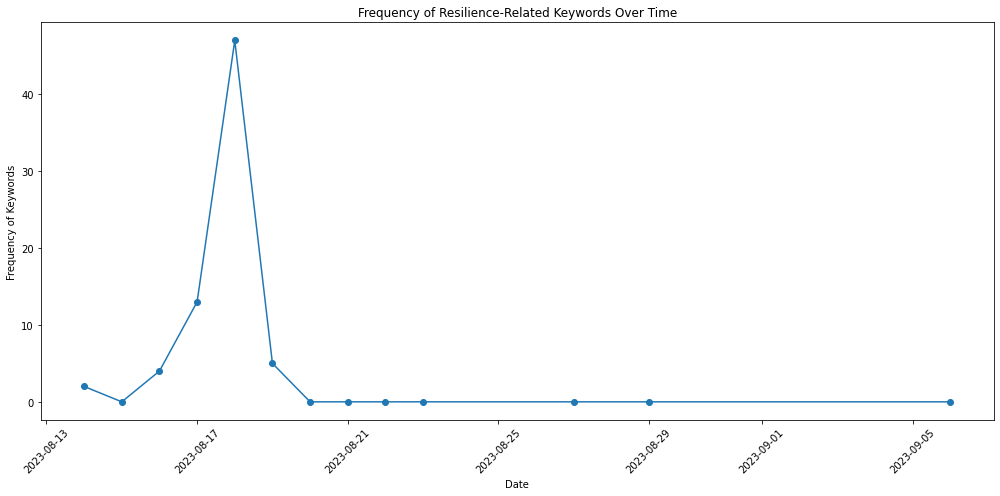

In [13]:
import numpy as np
# Define the list of keywords related to resilience and recovery
keywords = ["recover", "rebuild", "return to normal",
            "resilience", "aid", "support", "heal", "restore"]

# Function to count the occurrences of keywords in the tweets

def count_keywords(text, keywords):
    return sum(text.count(keyword) for keyword in keywords)

# Count occurrences of keywords in each tweet
df_g['keyword_count'] = df_g['text_normalized'].apply(
    lambda text: count_keywords(text, keywords))

# Group by creation_date to see the frequency of keywords over time
keyword_time_series = df_g.groupby(df_g['time'].dt.date)[
    'keyword_count'].sum().reset_index()

# Convert 'time' column to numpy array
time_array = np.array(keyword_time_series['time'])

# Plotting the time series of keyword frequency
plt.figure(figsize=(14, 7))
plt.plot(time_array, keyword_time_series['keyword_count'], marker='o')
plt.title('Frequency of Resilience-Related Keywords Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency of Keywords')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
sorted_df_g = df_g.sort_values(by='Reactions', ascending=False)

sorted_df_g[['Content', 'Reactions']].head(20)

,Content,Reactions
392,This is Jane Ostler Groenewegen\nI am in High ...,257
352,So these young men were in the kingsway mall t...,253
128,The value of the Deh Cho Bridge accommodating ...,252
36,Any support or prayers are greatly appreciated...,235
125,#Admin note:\n\nDue to the difficulties involv...,231
295,There is a group gathered at Salt Mountain in ...,220
97,I was born and raised in Hay River. I now liv...,213
111,Ethel chalifoux \nBrenda chalifoux\nRay Sander...,199
58,🙏🏻🙏🏻🙏🏻,180
9,"Hi, we are a family who live 2 1/2 south of Ca...",178


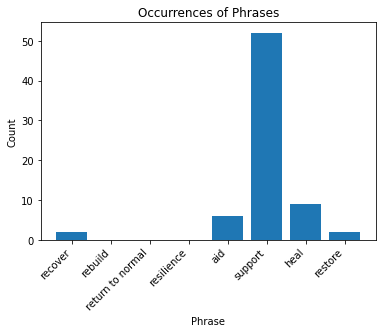

In [15]:
# Define the list of keywords related to resilience and recovery
keywords = ["recover", "rebuild", "return to normal",
            "resilience", "aid", "support", "heal", "restore"]

# Function to count the occurrences of each phrase in the tweets
def count_phrases(text, phrases):
    phrase_count = {}
    for phrase in phrases:
        count = text.count(phrase)
        phrase_count[phrase] = count
    return phrase_count

# Count occurrences of each phrase in each tweet
df_g['phrase_counts'] = df_g['text_normalized'].apply(lambda text: count_phrases(text, keywords))

# Sum up the counts for each phrase across all tweets
total_phrase_counts = {}
for index, row in df_g.iterrows():
    for phrase, count in row['phrase_counts'].items():
        total_phrase_counts[phrase] = total_phrase_counts.get(phrase, 0) + count

# Create a bar chart of the total occurrences of each phrase
plt.bar(total_phrase_counts.keys(), total_phrase_counts.values())
plt.xlabel('Phrase')
plt.ylabel('Count')
plt.title('Occurrences of Phrases')
plt.xticks(rotation=45, ha='right')
plt.show()

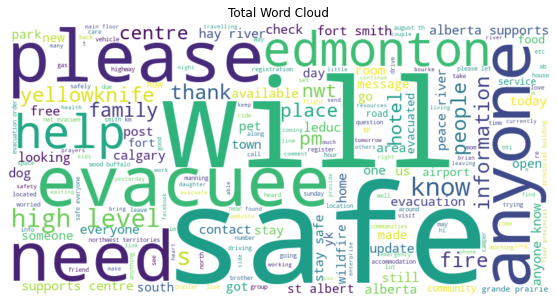

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(df_g['text_normalized'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Total Word Cloud')
plt.show()

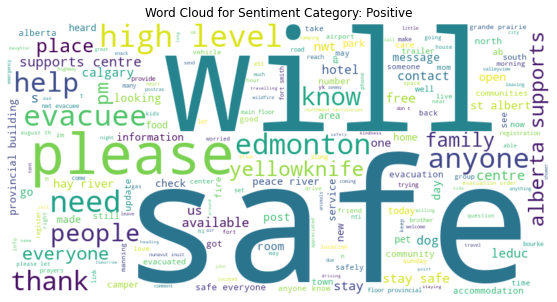

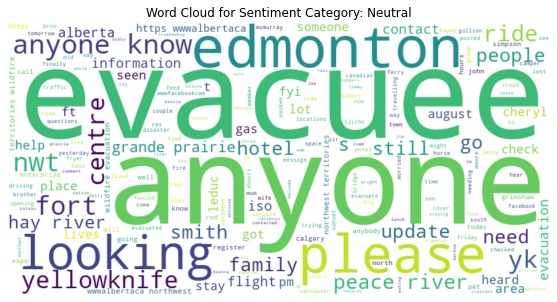

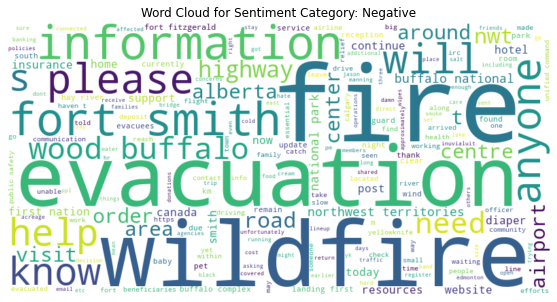

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df_s is your DataFrame containing the text data and sentiment categories

sentiment_categories = df_g['Sentiment_Category'].unique()

# Generate word clouds for each sentiment category
for sentiment_category in sentiment_categories:
    text = ' '.join(df_g[df_g['Sentiment_Category'] == sentiment_category]['text_normalized'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Sentiment Category: {sentiment_category}')
    plt.show()

## Network Analysis

In [18]:
df_g['Poster'].nunique()

330

In [19]:
import plotly.graph_objects as go
import pandas as pd
import networkx as nx


# Create directed graph
G = nx.DiGraph()

# Add edges for original post authors to commenters, excluding NaN values
for i, row in df_g.iterrows():
    if pd.notna(row['topComments_0_poster']):
        G.add_edge(row['Poster'], row['topComments_0_poster'])
    if pd.notna(row['topComments_1_poster']):
        G.add_edge(row['Poster'], row['topComments_1_poster'])
    

# Calculate node positions using spring layout
pos = nx.spring_layout(G)

# Create edge traces
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Create node traces
node_x = []
node_y = []
node_connections = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_connections.append(len(list(G.neighbors(node))))

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=node_connections,  # Color nodes based on number of connections
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2),
    text=[f'<b>Node:</b> {node}<br><b>Connections:</b> {len(list(G.neighbors(node)))}' for node in G.nodes()]
)

# Create figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='<br>Directed Connections between Original Post Authors and Commenters',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    annotations=[dict(
                        text="Made with Plotly",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002)],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
                ))

# Show figure
fig.show()


In [20]:
import plotly.graph_objects as go
import pandas as pd
import networkx as nx

# Create directed graph
G = nx.DiGraph()

# Add edges for original post authors to commenters, excluding NaN values
for i, row in df_g.iterrows():
    if pd.notna(row['topComments_0_poster']):
        G.add_edge(row['Poster'], row['topComments_0_poster'])
    if pd.notna(row['topComments_1_poster']):
        G.add_edge(row['Poster'], row['topComments_1_poster'])
    
# Calculate node positions using spring layout
pos = nx.spring_layout(G)

# Create edge traces
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Create node traces
node_x = []
node_y = []
node_connections = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    in_edges = len([edge for edge in G.in_edges(node) if pd.notna(edge[0])])
    out_edges = len([edge for edge in G.out_edges(node) if pd.notna(edge[1])])
    total_edges = in_edges + out_edges
    node_connections.append(total_edges)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=node_connections,  # Color nodes based on total number of edges
        size=10,
        colorbar=dict(
            thickness=15,
            title='Total Edges',
            xanchor='left',
            titleside='right'
        ),
        line_width=2),
    text=[f'<b>Name:</b> {node}<br>'
          f'<b>Outgoing Edges:</b> {", ".join(str(edge[0]) for edge in G.in_edges(node) if pd.notna(edge[0]))}<br>'
          f'<b>Incoming Edges:</b> {", ".join(str(edge[1]) for edge in G.out_edges(node) if pd.notna(edge[1]))}<br>'
          f'<b>Total Edges:</b> {total_edges}' for node, total_edges in zip(G.nodes(), node_connections)]
)

# Create figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='<br>Directed Connections between Original Post Authors and Commenters',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    annotations=[dict(
                        text="Made with Plotly",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002)],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
                ))

# Show figure
fig.show()
